## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras


Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    #x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 355us/step - loss: 1.9415 - acc: 0.3032 - val_loss: 1.8026 - val_acc: 0.3634
Epoch 2/30
50000/50000 [==============================] - 16s 315us/step - loss: 1.7392 - acc: 0.3838 - val_loss: 1.6810 - val_acc: 0.4089
Epoch 3/30
50000/50000 [==============================] - 16s 315us/step - loss: 1.6449 - acc: 0.4184 - val_loss: 1.6157 - val_acc: 0.4260
Epoch 4/30
50000/50000 [==============================] - 15s 300us/step - loss: 1.6042 - acc: 0.4304 - val_loss: 1.6125 - val_acc: 0.4224
Epoch 5/30
50000/50000 [==============================] - 14s 284us/step - loss: 1.5526 - acc: 0.4517 - val_loss: 1.5454 - val_acc: 0.4534
Epoch 6/30
50000/50000 [==============================] - 14s 287us/step - loss: 1.5114 - acc: 0.4649 - val_loss: 1.5114 - val_acc: 0.4657
Epoch 7/30
50000/50000 [==============================] - 14s 278us/step - loss: 1.4921 - acc: 0.4705 - val_loss: 1.

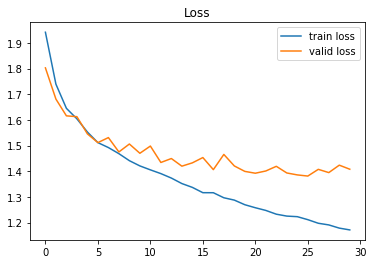

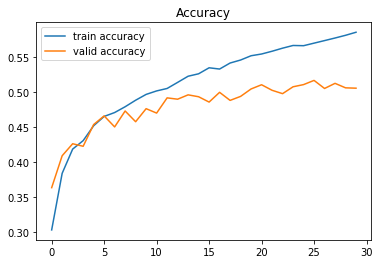

In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=30, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 296us/step - loss: 2.2657 - acc: 0.1401 - val_loss: 2.2033 - val_acc: 0.1844
Epoch 2/30
50000/50000 [==============================] - 12s 231us/step - loss: 2.1683 - acc: 0.2084 - val_loss: 2.1343 - val_acc: 0.2411
Epoch 3/30
50000/50000 [==============================] - 13s 260us/step - loss: 2.1105 - acc: 0.2508 - val_loss: 2.0860 - val_acc: 0.2657
Epoch 4/30
50000/50000 [==============================] - 13s 265us/step - loss: 2.0679 - acc: 0.2728 - val_loss: 2.0491 - val_acc: 0.2883
Epoch 5/30
50000/50000 [==============================] - 13s 269us/step - loss: 2.0334 - acc: 0.2903 - val_loss: 2.0181 - val_acc: 0.2957
Epoch 6/30
50000/50000 [==============================] - 13s 270us/step - loss: 2.0054 - acc: 0.3028 - val_loss: 1.9923 - val_acc: 0.3120
Epoch 7/30
50000/50000 [==============================] - 13s 261us/step - loss: 1.9817 - acc: 0.3113 - val_loss: 1.

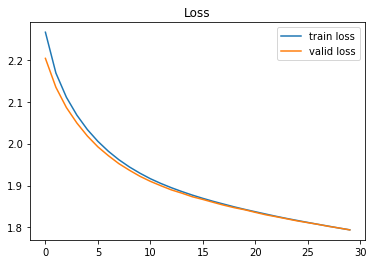

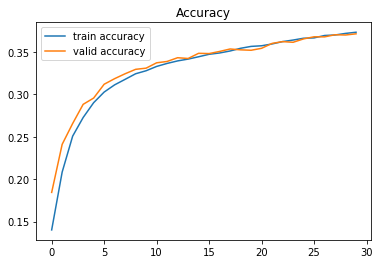

In [15]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    #x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
optimizer = keras.optimizers.SGDGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=30, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()